# K-Nearest Neighbors (KNN) Classification

**KNN** is a simply algorithm that works by comparing the query instance's distance to the other training samples and selecting the K-nearest neighbors. It takes the majority of these K-neighbor classes to be the prediciton of the query instance.

KNN is also sometimes used for regression in addition to classification.

In this section we are going to focus on its more common use as a classification task.

First, let's import the modules that we will need:

In [2]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt

#### Plotting the points

For this example, we will use a file named knn.csv containing the following data:

    x,y,c
    1,1,A
    2,2,A
    4,3,B
    3,3,A
    3,5,B
    5,6,B
    5,4,V

Now, let's read the data and plot it:

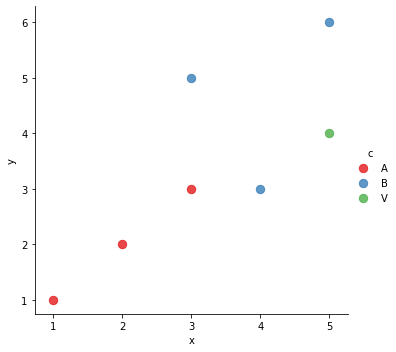

In [3]:
data = pd.read_csv("data/knn.csv")
sns.lmplot('x', 'y', data=data, hue='c', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.show()

#### Calculating the distance between the Points

In order to find the neares neighbor of a given point, you need to calculate the Euclidean distance between two points.

> Given two points p(p1, p2, p3, ..., pn) and q(q1, q2, q3, ..., qn), the distance between p and q is given by the following formula:
SQRT( (q1-p1)^2 + (q2-p2)^2 + ... + (qn-pn)^2)

Based on this formula, we can define a function named `euclidean_distance()` as follows:

In [4]:
def euclidean_distance(pt1, pt2, dimension):
    distance=0
    for x in range(dimension):
        distance += np.square(pt1[x] - pt2[x])
    return np.sqrt(distance)

### Implementing KNN

It takes the training points, the test point and the value of k:

In [5]:
#---our own KNN model---
def knn(training_points, test_point, k):
    distances = {}
    
    #---the number of axes we are dealing with---
    dimension = test_point.shape[1]
    
    #---calculating euclidean distance between each point in the training data and test data---
    for x in range(len(training_points)):
        dist = euclidean_distance(test_point, training_points.iloc[x], dimension)
        
        #---record the distance for each training point---
        distances[x] = dist[0]
    
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    
    #---to store the neighbors---
    neighbors = []
    
    #---extract the top k neightbors---
    for x in range(k):
        neighbors.append(sorted_d[x][0])
    
    #---for each neighbor found, find out its class---
    class_counter = {}
    for x in range(len(neighbors)):
        #---find out the class for that particular point---
        cls = training_points.iloc[neighbors[x]][-1]
        if cls in class_counter:
            class_counter[cls] += 1
        else:
            class_counter[cls] = 1
            
    #---sort the class_counter in descending order---
    sorted_counter = sorted(class_counter.items(), key=operator.itemgetter(1), reverse=True)
    
    #---return the class with the most count, as well as the neighbors found---
    return(sorted_counter[0][0], neighbors)
    
    

The function returns the class to which the test point belongs, as well as the indices of all nearest k neighbors.

### Making predictions
Now, we can make some predictions:

In [6]:
test_set = [[3, 3.9]]
test = pd.DataFrame(test_set)
cls, neighbors = knn(data, test, 3)
print("Predicted class: " + cls)

Predicted class: B


#### Visualizing different values of K

Visualize the effect of applying various values of K. The following code draws a serie of concentric circles around the test point based on the values of k, which range from 7 to 1, with intervals of -2:

k =  7
Class A
Neighbors
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
6  5  4  V
1  2  2  A
5  5  6  B
0  1  1  A
k =  5
Class A
Neighbors
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
6  5  4  V
1  2  2  A
k =  3
Class B
Neighbors
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
k =  1
Class A
Neighbors
   x  y  c
3  3  3  A


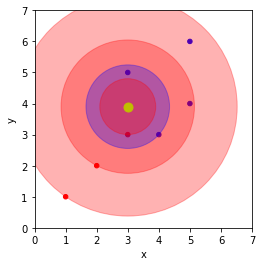

In [7]:
colors = ['r' if i == 'A' else 'b' for i in data['c']]
ax = data.plot(kind='scatter', x='x', y='y', c=colors)
plt.xlim(0,7)
plt.ylim(0,7)

plt.plot(test_set[0][0], test_set[0][1], "yo", markersize='9')

for k in range(7, 0, -2):
    cls, neighbors = knn(data, test, k)
    
    print("=============")
    print("k = ", k)
    print("Class", cls)
    print("Neighbors")
    print(data.iloc[neighbors])
    
    furthest_point = data.iloc[neighbors].tail(1)
    
    radius = euclidean_distance(test, furthest_point.iloc[0], 2)
    
    c = 'r' if cls=='A' else 'b'
    circle = plt.Circle((test_set[0][0], test_set[0][1],), radius, color=c, alpha=0.3)
    ax.add_patch(circle)
    
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Using Scikit-Learn's KNeighborsClassifier class for KNN

Now that we have manually implemented KNN in Python. let's use the implementation provided by Scikit-Learn.

The following code load the Iris dataset and plots it out using a scatter plot:

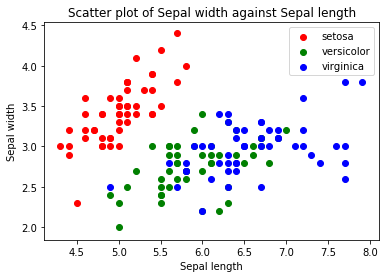

In [8]:
%matplotlib inline
import matplotlib.patches as mpatches
from sklearn import svm, datasets

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

colors = ['red', 'green', 'blue']

for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
    
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

Let's train a model with `KNeighborsClassifier`, for start, let's use a `k` of `1`.

(array([0, 1, 2]), array([50, 51, 49]))


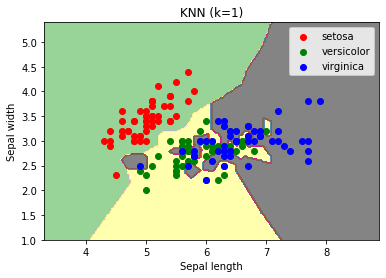

In [9]:
from sklearn.neighbors import KNeighborsClassifier

k = 1

knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

h = (x_max / x_min) / 100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)

predictions = knn.predict(X)

#--Classification based on predictions--
print(np.unique(predictions, return_counts=True))

### How to find out the ideal value of`k`? -> Cross-Validation

Instead of using part of the data for training and part of the data for testing, we can split our data into k-folds and terain the model k-times, rotating the training and the testing sets. So now, each point of data is used for training and testing.

> Do not confuse the k in k-folds with the k in KNN - they are not related.

At the end of each run, the model is scored, and at the end of k runs, the score is averaged. This iscore will give us information of how well our algorithm performs.

> The idea of cross-validation is not training our model, is to test how good it is. It is useful when we compare various algorithms to see how they perform given a dataset. Once the algorithm is chosen, we will use all of the data for the training model.

##### Parameter-Tuning K

Now, let's apply cross-validation to our Iris dataset using 10 folds. We will do it for each value of k:

In [10]:
from sklearn.model_selection import cross_val_score

#--- holds the cv scores ---
cv_scores = []

#--- use all features ---
X = iris.data[:, :4]
y = iris.target

#--- number of folds ---
folds = 10

#--- creating odd list of K for KNN ---
ks = list(range(1, int(len(X) * ((folds - 1) / folds))))

#--- remove all multiples of 3 ---
ks = [k for k in ks if k % 3 != 0]

#--- perform k-fold cross-validation ---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #--- performs cross-validation and returns the average accuracy---
    scores = cross_val_score(knn, X, y, cv=folds, scoring='accuracy')
    mean = scores.mean()
    cv_scores.append(mean)
    print(k, mean)

1 0.96
2 0.9533333333333334
4 0.9666666666666666
5 0.9666666666666668
7 0.9666666666666668
8 0.9666666666666668
10 0.9666666666666668
11 0.9666666666666668
13 0.9800000000000001
14 0.9733333333333334
16 0.9733333333333334
17 0.9733333333333334
19 0.9733333333333334
20 0.9800000000000001
22 0.9666666666666666
23 0.9733333333333334
25 0.9666666666666666
26 0.96
28 0.9533333333333334
29 0.9533333333333334
31 0.9466666666666667
32 0.9466666666666667
34 0.9466666666666667
35 0.9466666666666667
37 0.9466666666666667
38 0.9466666666666667
40 0.9533333333333334
41 0.9533333333333334
43 0.9466666666666667
44 0.9400000000000001
46 0.9333333333333333
47 0.9333333333333333
49 0.9400000000000001
50 0.9266666666666667
52 0.9333333333333333
53 0.9333333333333333
55 0.9333333333333333
56 0.9066666666666666
58 0.9133333333333334
59 0.9200000000000002
61 0.9199999999999999
62 0.9066666666666666
64 0.9
65 0.9
67 0.8866666666666667
68 0.8800000000000001
70 0.8866666666666667
71 0.8866666666666667
73 0.893

For KNN, tnere are three rules to which we must adhere:
- The value of k cannot exceed the number of rows for training
- The value of k should be an odd number for a two class problem
- The value of k must not be a multiple of the number of classes

Hence, the value of k in the preceding code contains 134 values.

#### Finding the optimal K

Simply find the value with highest accuracy. Or, in this case, the lowest missclassification error (MSE). Let's plot a line chart of MSE against k:

The optimal number of neighbors is 13


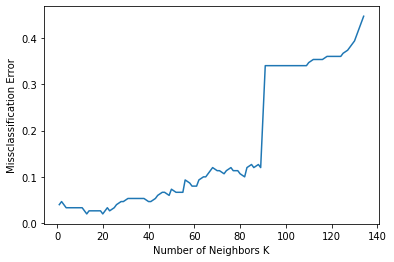

In [11]:
MSE = [1 - x for x in cv_scores]

optimal_k = ks[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")

plt.plot(ks, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Missclassification Error')
plt.show()

### Summary

We have learned how KNN works and how to derive the optimal k value that minimizes the miscalculation of errors.